In [108]:
# IPython log file
import warnings
import pathlib
import os
from glob import glob
from os.path import join
import shutil # for remove directory
#
import pathlib
import obspy
from obspy import read
from obspy import Stream
import numpy as np
import pandas as pd
from obspy import Trace, UTCDateTime
from obspy.core import AttribDict
import matplotlib.pyplot as plt
# ------------------------------------------------------------
# Main directory
curdir = os.getcwd()
# Input data directory
indir = curdir+'/input/'
# Output data directory
outdir = curdir + '/output/'
#
if not os.path.exists(outdir):
    os.makedirs(outdir, mode=0o777, exist_ok=True)
# Read all independent files in directory
files = glob(indir+"*.miniseed")
# Trick = create Dataframe for query stations
result = []
for i,fn in enumerate(files):
    stanm = fn.split("\\")[-1].split(".")[1]
#     print(stanm)
    result.append(stanm)
# check how may station:
stations = pd.DataFrame(result,columns =['stanm']).stanm.unique()
for i, station in enumerate(stations):
    print(i,station)

0 DLV
1 SLV


In [117]:
# Read in single station and write out
for i, station in enumerate(stations):
    # list all files
    file1 = glob(indir+f"*{station}*.miniseed")
    of = f"{station}_full.miniseed"
    print(of)
    st_single = Stream()
    for file in file1:
        st_single += read(file).merge(fill_value=0) # All trace already read here!
    st_single.write(outdir+of, format="MSEED")  

DLV_full.miniseed
SLV_full.miniseed


In [118]:
# Read  all stations and write out
file1 = glob(indir+f"*.miniseed")
of = f"all_station_full.miniseed"
# print(of)
st_all = Stream()
for file in file1:
    st_all += read(file).merge(fill_value=0) # All trace already read here!
st_all.write(outdir+of, format="MSEED")  

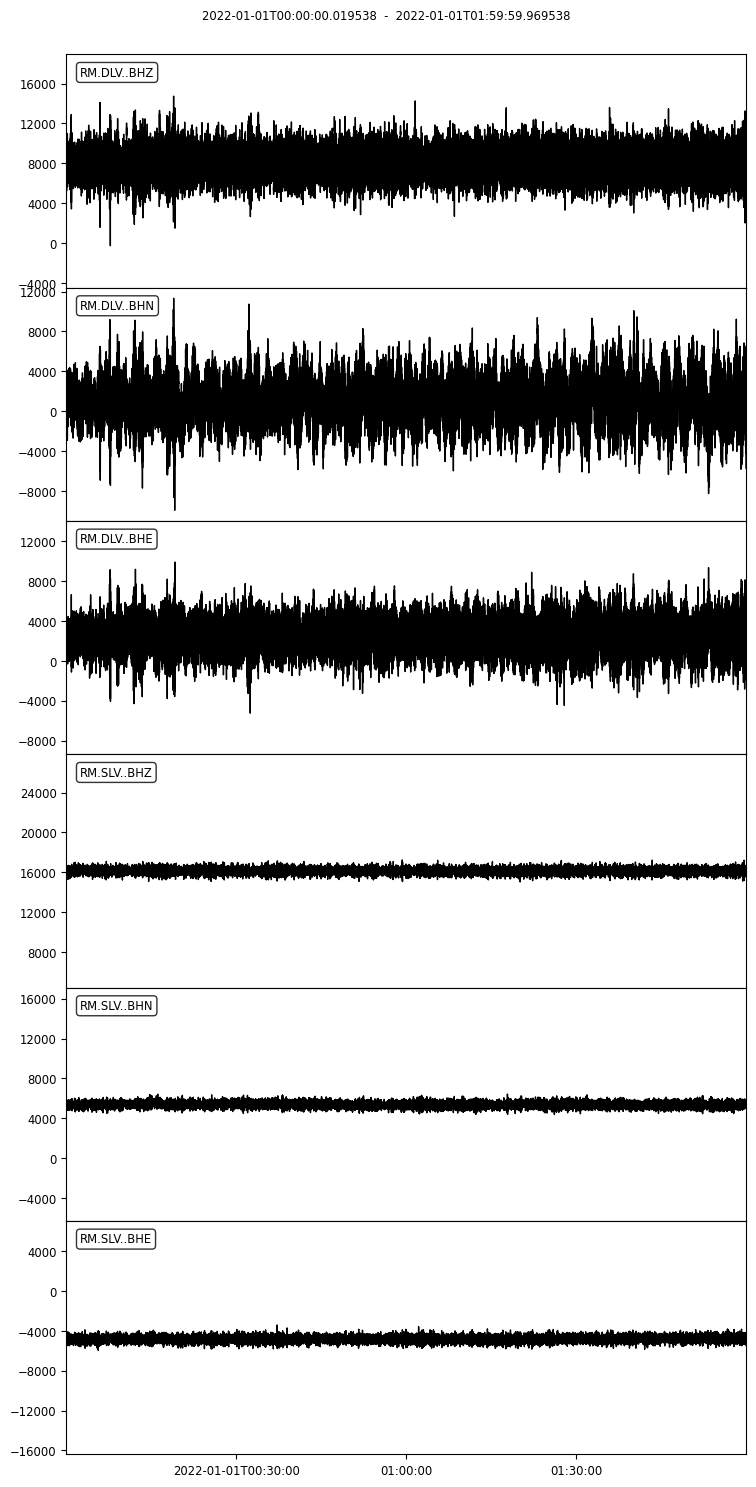

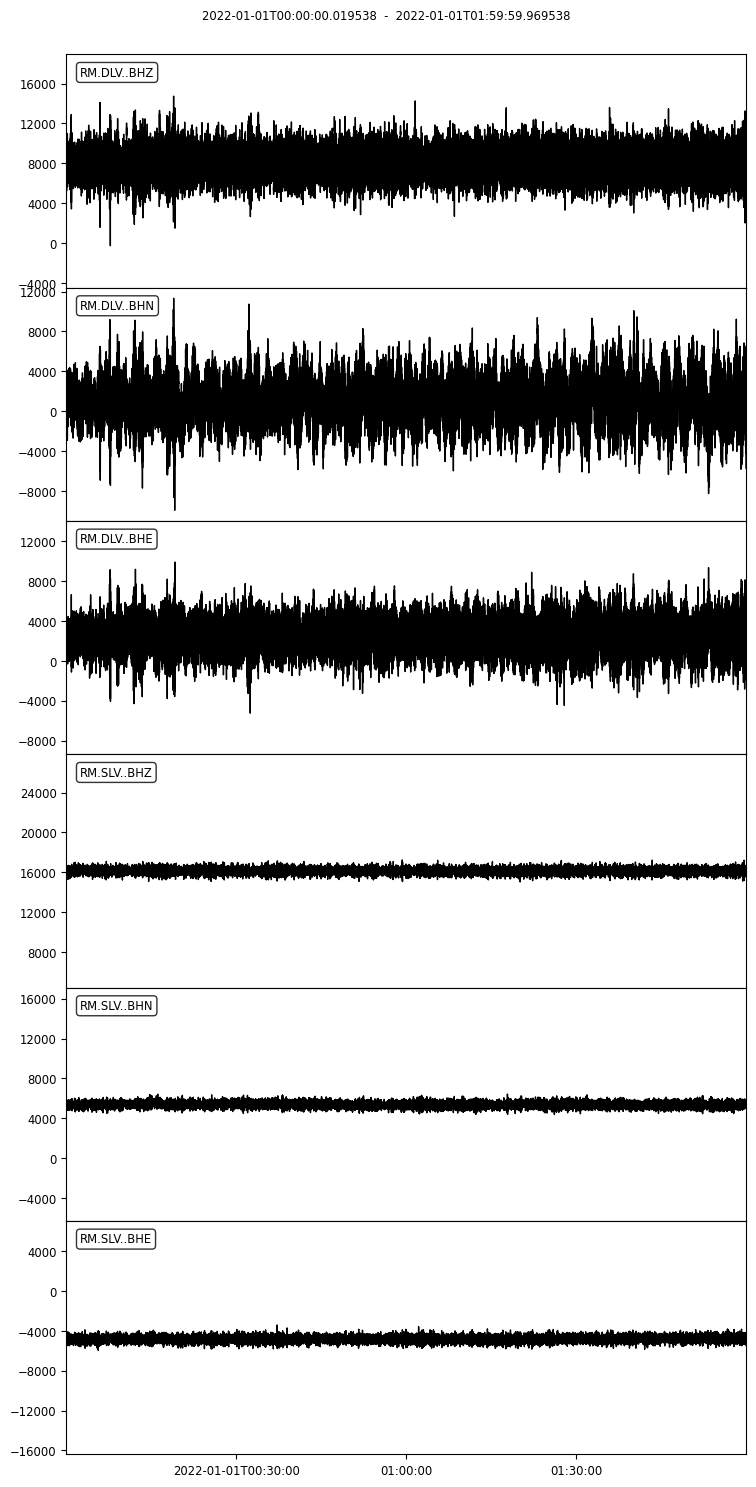

In [121]:
# Plot 
# st = read(outdir+"DLV_full.miniseed").merge()
# st.plot()
# all station
st = read(outdir+"all_station_full.miniseed").merge()
st.plot()